<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int6

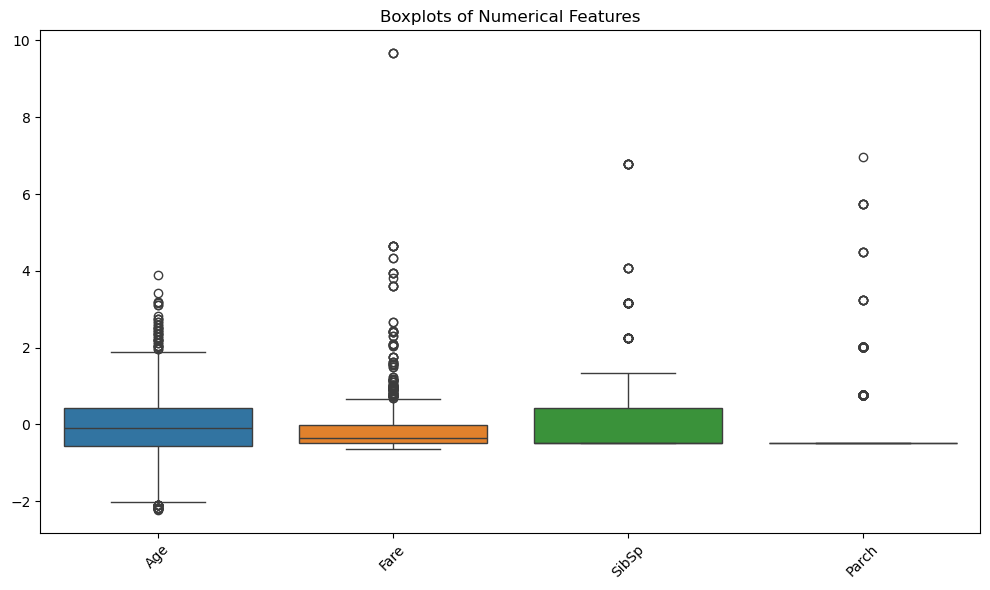

In [10]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler


df = pd.read_csv("Titanic-Dataset.csv")


print(df.info())
print(df.isnull().sum())


df['Age'] = df['Age'].fillna(df['Age'].median())
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])
df['Cabin'] = df['Cabin'].fillna('Unknown')


le = LabelEncoder()
df['Sex'] = le.fit_transform(df['Sex'])  # male=1, female=0
df['Embarked'] = le.fit_transform(df['Embarked'])
df['Deck'] = df['Cabin'].apply(lambda x: x[0] if x != 'Unknown' else 'U')
df['Deck'] = le.fit_transform(df['Deck'])


scaler = StandardScaler()
num_cols = ['Age', 'Fare', 'SibSp', 'Parch']
df[num_cols] = scaler.fit_transform(df[num_cols])


plt.figure(figsize=(10, 6))
sns.boxplot(data=df[num_cols])
plt.title("Boxplots of Numerical Features")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
